### Additional task

Prices data comparasion

Libriares import: adding all neccesary instruments to the project

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data reading

In [94]:
data_parsing = pd.read_excel('data/Data_TSUM.xlsx', sheet_name = 'Data_Parsing')

In [95]:
data_parsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           75 non-null     object
 1   Category        75 non-null     object
 2   producer_id     75 non-null     object
 3   producer_color  75 non-null     object
 4   price           75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [96]:
data_company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name = 'Data_Company')

In [97]:
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          75 non-null     object
 1   Category       75 non-null     object
 2   item_id        75 non-null     object
 3   color_id       75 non-null     object
 4   current price  75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


Defining function to clean up parsing data

In [98]:
def simbol_cleanup(text):
    bad_simbol = {'_', '-', '~', '\\', '/'}
    for simbol in bad_simbol:
        text = text.replace(simbol, '')
    return text

In [99]:
data_parsing.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


In [100]:
data_parsing['producer_id'] = data_parsing['producer_id'].apply(simbol_cleanup)
data_parsing['producer_color'] = data_parsing['producer_color'].apply(simbol_cleanup)
data_parsing.head()

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250


Merging tables

In [101]:
data_parsing['producer_id'].nunique()

75

In [102]:
data_company['item_id'].nunique()

75

In [103]:
data_merged = data_parsing.merge(
    data_company.drop(labels = ['brand', 'Category'], axis = 1),
    how = 'left',
    left_on = 'producer_id',
    right_on = 'item_id'
)
data_merged.info()
display(data_merged)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           75 non-null     object
 1   Category        75 non-null     object
 2   producer_id     75 non-null     object
 3   producer_color  75 non-null     object
 4   price           75 non-null     int64 
 5   item_id         75 non-null     object
 6   color_id        75 non-null     object
 7   current price   75 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 5.3+ KB


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222


Prices comparasion

In [104]:
data_merged['price_comparasion'] = data_merged['price'] / data_merged['current price'] * 100
display(data_merged)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_comparasion
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,67.611336
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,116.770186
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,78.632479
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,117.365269
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.398693
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,99.393939
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,80.612245
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,82.203390
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,115.315315


In [105]:
data_merged['brand/category'] = data_merged['brand'] + '/' + data_merged['Category']
display(data_merged)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_comparasion,brand/category
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,67.611336,Valentino/Shoes
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,116.770186,Valentino/Shoes
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,78.632479,Valentino/Shoes
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,117.365269,Valentino/Shoes
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.398693,Valentino/Shoes
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,99.393939,Stone Island/Bags
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,80.612245,Stone Island/Bags
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,82.203390,Stone Island/Bags
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,115.315315,Stone Island/Bags


Outliers detection using Tukey method

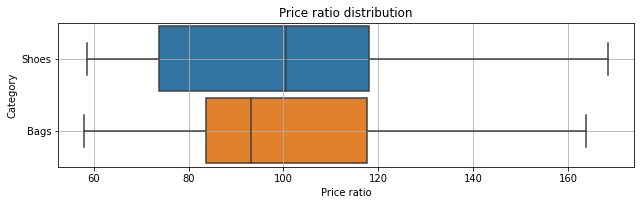

In [106]:
fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes((1, 1, 1, 1))

boxplot = sns.boxplot(
    data=data_merged,
    x='price_comparasion',
    y = 'Category',
    orient='h',
    width=0.9,
    ax = axes
)
boxplot.set_title('Price ratio distribution');
boxplot.set_xlabel('Price ratio');
boxplot.set_ylabel('Category');
boxplot.grid()

No obvious outliers here.

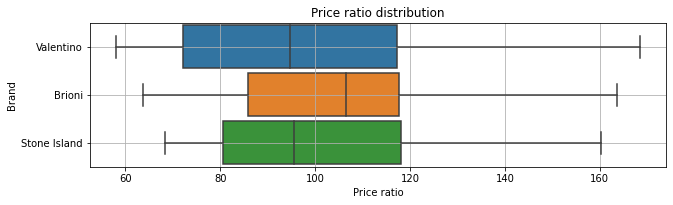

In [107]:
fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes((1, 1, 1, 1))

boxplot = sns.boxplot(
    data=data_merged,
    x='price_comparasion',
    y = 'brand',
    orient='h',
    width=0.9,
    ax = axes
)
boxplot.set_title('Price ratio distribution');
boxplot.set_xlabel('Price ratio');
boxplot.set_ylabel('Brand');
boxplot.grid()

Same, no outliers.

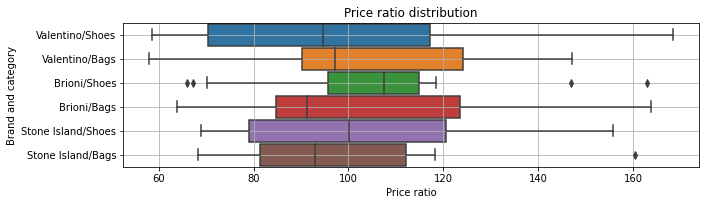

In [108]:
fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes((1, 1, 1, 1))

boxplot = sns.boxplot(
    data=data_merged,
    x='price_comparasion',
    y = 'brand/category',
    orient='h',
    width=0.9,
    ax = axes
)
boxplot.set_title('Price ratio distribution');
boxplot.set_xlabel('Price ratio');
boxplot.set_ylabel('Brand and category');
boxplot.grid()

Finaly, got some outliers!

In [109]:
data_merged['brand/category'].value_counts()

Valentino/Shoes       14
Brioni/Shoes          14
Stone Island/Shoes    14
Valentino/Bags        11
Brioni/Bags           11
Stone Island/Bags     11
Name: brand/category, dtype: int64

In [110]:
data_merged['outliers'] = 'no'
display(data_merged)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_comparasion,brand/category,outliers
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,67.611336,Valentino/Shoes,no
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,116.770186,Valentino/Shoes,no
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,78.632479,Valentino/Shoes,no
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,117.365269,Valentino/Shoes,no
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.398693,Valentino/Shoes,no
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,99.393939,Stone Island/Bags,no
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,80.612245,Stone Island/Bags,no
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,82.203390,Stone Island/Bags,no
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,115.315315,Stone Island/Bags,no


In [111]:
def outliers_iqr_mod(data, feature, log_scale = False, left = 1.5, right = 1.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

Brioni/Shoes outliers

In [112]:
outliers, cleaned = outliers_iqr_mod(data_merged[data_merged['brand/category'] == 'Brioni/Shoes'], 'price_comparasion')
print(f'Tukey outlier number: {outliers.shape[0]}')
print(f'The resulting number of records: {cleaned.shape[0]}')

Tukey outlier number: 4
The resulting number of records: 10


In [113]:
for i in outliers.index:
    data_merged.loc[i, 'outliers'] = 'yes'    

Stone Island/Bags outliers

In [114]:
outliers, cleaned = outliers_iqr_mod(data_merged[data_merged['brand/category'] == 'Stone Island/Bags'], 'price_comparasion')
print(f'Tukey outlier number: {outliers.shape[0]}')
print(f'The resulting number of records: {cleaned.shape[0]}')

Tukey outlier number: 1
The resulting number of records: 10


In [115]:
for i in outliers.index:
    data_merged.loc[i, 'outliers'] = 'yes'

Output

In [117]:
data_merged.drop(labels = 'brand/category', axis = 1, inplace = True)
data_merged.to_excel('data/merged_TSUM.xlsx', sheet_name = 'Summary', index = False)